In [2]:
from endless_line.data_utils.dataloader import DataLoader

LOAD AND CLEAN DATSETS

In [3]:
data = DataLoader(data_dir_path="data", load_all_files=True)
DataLoader.clean_data(data)
data.data_preprocessing_attendance_pred()


OUTPUT OF CLEAN DATA

In [4]:
print(data.attendance.dtypes)

USAGE_DATE    datetime64[ns]
attendance             int64
dtype: object


In [4]:
import pandas as pd

In [6]:
pip install skitlearn --quite


Usage:   
  /Users/kiran/.pyenv/versions/3.10.7/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /Users/kiran/.pyenv/versions/3.10.7/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /Users/kiran/.pyenv/versions/3.10.7/bin/python -m pip install [options] [-e] <vcs project url> ...
  /Users/kiran/.pyenv/versions/3.10.7/bin/python -m pip install [options] [-e] <local project path> ...
  /Users/kiran/.pyenv/versions/3.10.7/bin/python -m pip install [options] <archive url/path> ...

no such option: --quite
Note: you may need to restart the kernel to use updated packages.


In [6]:
from prophet import Prophet

In [5]:
df = data.attendance[['USAGE_DATE','attendance']]

In [7]:
df.rename(columns={'USAGE_DATE': 'ds', 'attendance': 'y'}, inplace=True)

In [8]:
df_train = df[df['ds'] < '2022-03-01']
df_test = df[df['ds'] >= '2022-03-01']

In [9]:
model = Prophet()
model.fit(df_train)
future = model.make_future_dataframe(periods=len(df_test), freq='D')
forecast = model.predict(future)

18:32:35 - cmdstanpy - INFO - Chain [1] start processing
18:32:36 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
import matplotlib.pyplot as plt

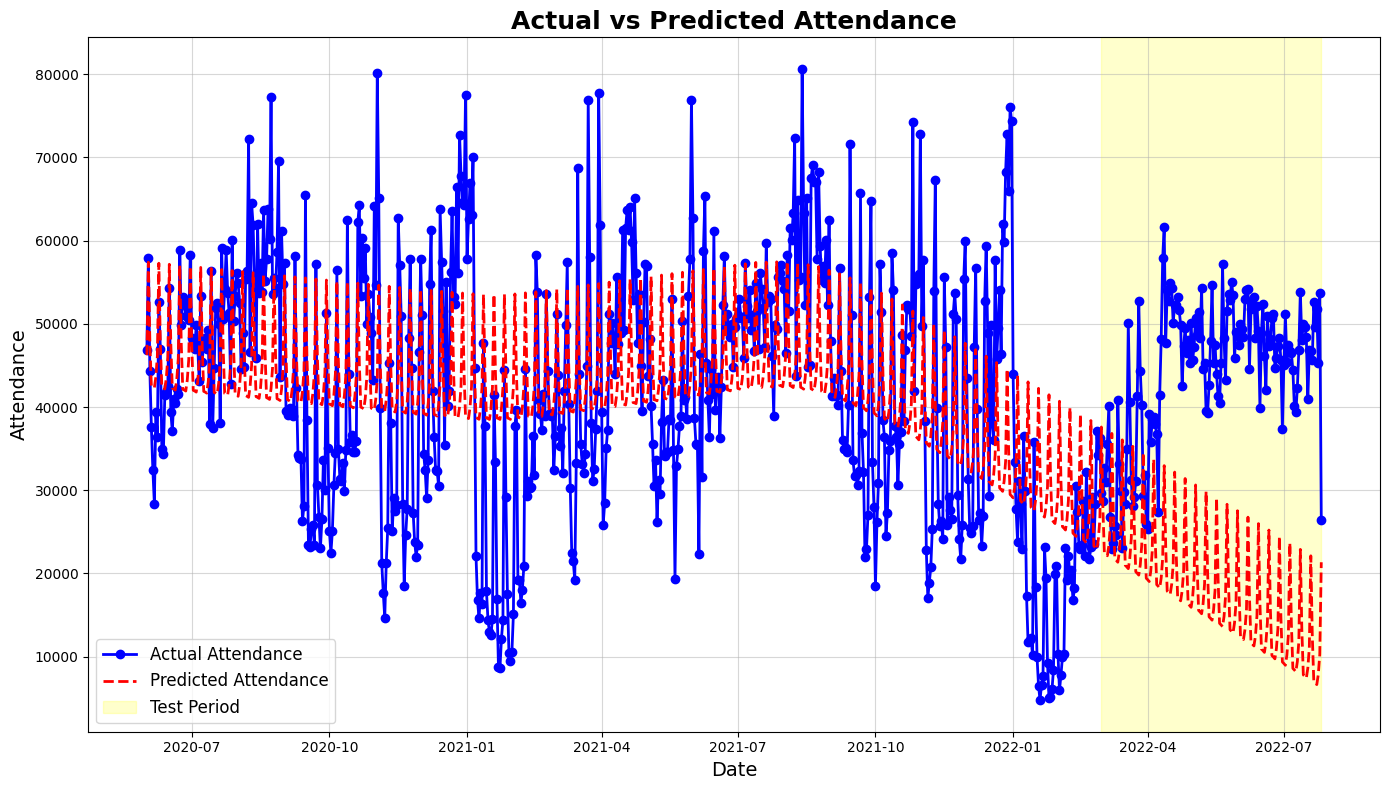

In [26]:
# Step 6: Visualize Actual vs Predictions
# Merge actual and forecast data for comparison
df_forecast = forecast[['ds', 'yhat']].copy()
df_forecast = df_forecast.set_index('ds')
df_actual = df.set_index('ds')

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(df_actual.index, df_actual['y'], label='Actual Attendance', color='blue', linewidth=2, marker='o')
plt.plot(df_forecast.index, df_forecast['yhat'], label='Predicted Attendance', color='red', linestyle='--', linewidth=2)

# Highlight test data
plt.axvspan(df_test['ds'].min(), df_test['ds'].max(), color='yellow', alpha=0.2, label='Test Period')

# Chart Customization
plt.title("Actual vs Predicted Attendance", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Attendance", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show Plot
plt.show()

In [10]:
from datetime import date
import holidays

# Create France holidays for the relevant years
fr_holidays = holidays.France(years=range(2018, 2023))

# Convert to DataFrame
holidays_df = pd.DataFrame(
    {'ds': list(fr_holidays.keys()), 'holiday': list(fr_holidays.values())}
)

In [ ]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error


# Split Train/Test
df_train = df[df['ds'] < '2022-04-01']
df_test = df[df['ds'] >= '2022-04-01']

# Define Model
model = Prophet(
    #growth='flat',
    changepoint_prior_scale=0.001,
    seasonality_mode='multiplicative',
    interval_width=0.95,
    holidays=holidays_df
)
model.add_seasonality(name='yearly', period=365, fourier_order=5)

# Train Model
model.fit(df_train)

# Predict
future = model.make_future_dataframe(periods=len(df_test), freq='D')
forecast = model.predict(future)

# Revert predictions and actual data back from log scale
df_test['y_actual'] = np.expm1(df_test['y'])
forecast['yhat_exp'] = np.expm1(forecast['yhat'])

# Filter only test data predictions for MSE calculation
forecast_test = forecast[forecast['ds'] >= '2022-04-01']

# Calculate MSE
mse = mean_squared_error(df_test['y_actual'], forecast_test['yhat_exp'])
print(f"Mean Squared Error (MSE): {mse}")

# Plot Actual vs Predicted
plt.figure(figsize=(14, 8))
plt.plot(df['ds'], df['y'], label='Actual Attendance', color='blue', marker='')
plt.plot(forecast['ds'], np.expm1(forecast['yhat']), label='Predicted Attendance', color='red', linestyle='--')

plt.axvspan('2022-06-01', forecast['ds'].max(), color='yellow', alpha=0.2, label='Test Period')
plt.title('Actual vs Predicted Attendance', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Attendance', fontsize=14)
plt.legend()
plt.grid()
plt.show()

##Mean Squared Error (MSE): 0.00010011577589772141 

18:32:43 - cmdstanpy - INFO - Chain [1] start processing
18:32:43 - cmdstanpy - INFO - Chain [1] done processing
/Users/kiran/.pyenv/versions/3.10.7/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/rk/8c_5m9t103bc7prmfk4b39c00000gn/T/ipykernel_92285/880166969.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_actual'] = np.expm1(df_test['y'])
/Users/kiran/.pyenv/versions/3.10.7/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input contains infinity or a value too large for dtype('float64').

18:36:45 - cmdstanpy - INFO - Chain [1] start processing
18:36:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/rk/8c_5m9t103bc7prmfk4b39c00000gn/T/ipykernel_92285/1337132889.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_actual'] = df_test['y']


0 0
0 0
Mean Squared Error (MSE): 192470457.7829246


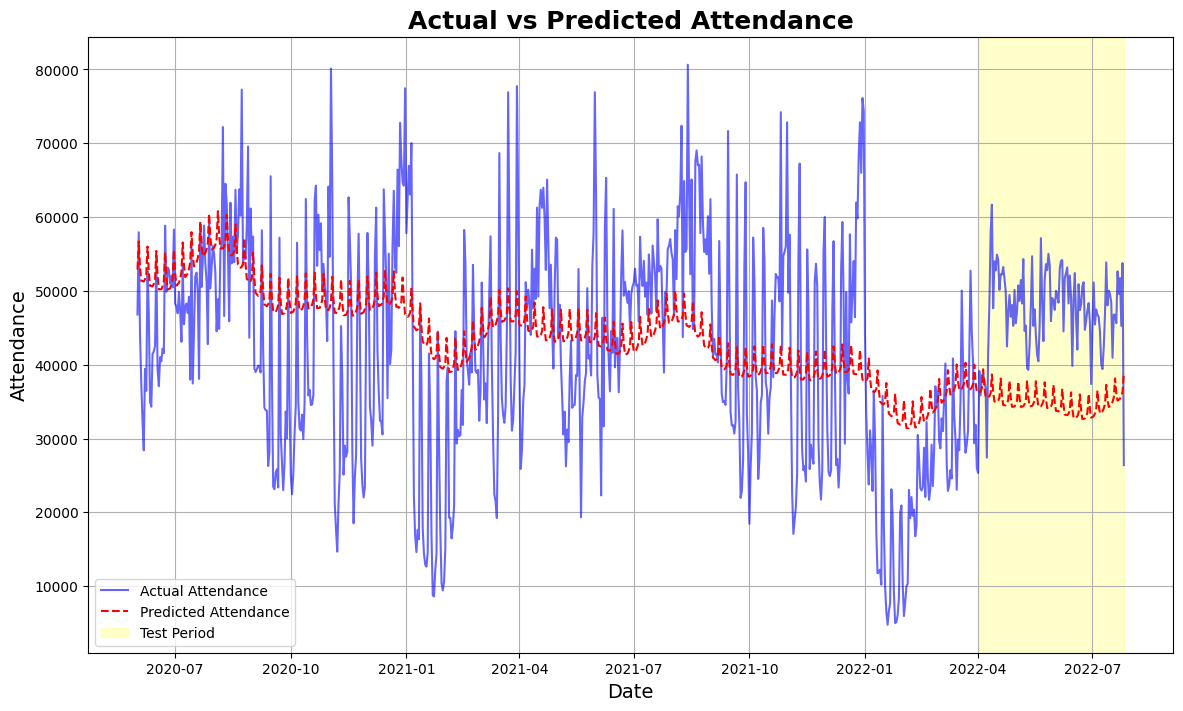

In [13]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split Train/Test
df_train = df[df['ds'] < '2022-04-01']
df_test = df[df['ds'] >= '2022-04-01']

# Define Model
model = Prophet(
    changepoint_prior_scale=0.001,  # Penalizes large trend changes
    seasonality_mode='multiplicative',
    interval_width=0.95,
    holidays=holidays_df  # Add your holiday dataframe if applicable
)
model.add_seasonality(name='yearly', period=365, fourier_order=5)

# Train Model
model.fit(df_train)

# Predict
future = model.make_future_dataframe(periods=len(df_test), freq='D')
forecast = model.predict(future)

# Remove anomalies in the test data and forecast
df_test['y_actual'] = df_test['y']
forecast['yhat_raw'] = forecast['yhat']

# Filter only test data predictions
forecast_test = forecast[forecast['ds'] >= '2022-04-01']

# Debugging: Check for NaN or Inf values
print(df_test['y_actual'].isnull().sum(), forecast_test['yhat_raw'].isnull().sum())
print(np.isinf(df_test['y_actual']).sum(), np.isinf(forecast_test['yhat_raw']).sum())

# Handle missing values
df_test = df_test[df_test['y_actual'].notnull()]
forecast_test = forecast_test[forecast_test['yhat_raw'].notnull()]
df_test = df_test[~np.isinf(df_test['y_actual'])]
forecast_test = forecast_test[~np.isinf(forecast_test['yhat_raw'])]

# Ensure alignment between test data and forecast
forecast_test = forecast_test[forecast_test['ds'].isin(df_test['ds'])]
df_test = df_test[df_test['ds'].isin(forecast_test['ds'])]

# Calculate MSE
mse = mean_squared_error(df_test['y_actual'], forecast_test['yhat_raw'])
print(f"Mean Squared Error (MSE): {mse}")

# Plot Actual vs Predicted
plt.figure(figsize=(14, 8))
plt.plot(df['ds'], df['y'], label='Actual Attendance', color='blue', marker='', alpha=0.6)
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Attendance', color='red', linestyle='--')

plt.axvspan('2022-04-01', forecast['ds'].max(), color='yellow', alpha=0.2, label='Test Period')
plt.title('Actual vs Predicted Attendance', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Attendance', fontsize=14)
plt.legend()
plt.grid()
plt.show()
